In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt

Используя интерполяционную формулу Лагранжа для
неравноотстоящих узлов a) построить многочлен Лагранжа
(вывести формулу), b) вывести график многочлена Лагранжа на
заданном промежутке, c) вычислить значения функции при
данных значениях аргумента, d) отметить на графике (разными
цветами) узлы интерполяции, а также предсказанные значения
функции.

In [2]:
x=sp.Symbol("x")
L = 0.80866 * (x - 0.73)*(x - 0.80)*(x - 0.88)*(x - 0.93)*(x - 0.99) / ((0.68 - 0.73)*(0.68 - 0.80)*(0.68 - 0.88)*(0.68 - 0.93)*(0.68 - 0.99)) + 0.89492 *  (x - 0.68)*(x - 0.80)*(x - 0.88)*(x - 0.93)*(x - 0.99) / ((0.73 - 0.68)*(0.73 - 0.80)*(0.73 - 0.88)*(0.73 - 0.93)*(0.73 - 0.99)) + 1.02964 * (x - 0.68)*(x - 0.73)*(x - 0.88)*(x - 0.93)*(x - 0.99) / ((0.80 - 0.68)*(0.80 - 0.73)*(0.80 - 0.88)*(0.80 - 0.93)*(0.80 - 0.99)) + 1.20966 * (x - 0.68)*(x - 0.73)*(x - 0.80)*(x - 0.93)*(x - 0.99) / ((0.88 - 0.68)*(0.88 - 0.73)*(0.88 - 0.80)*(0.88 - 0.93)*(0.88 - 0.99)) + 1.34087 * (x - 0.68)*(x - 0.73)*(x - 0.80)*(x - 0.88)*(x - 0.99) / ((0.93 - 0.68)*(0.93 - 0.73)*(0.93 - 0.80)*(0.93 - 0.88)*(0.93 - 0.99)) + 1.52368 * (x - 0.68)*(x - 0.73)*(x - 0.80)*(x - 0.88)*(x - 0.93) / ((0.99 - 0.68)*(0.99 - 0.73)*(0.99 - 0.80)*(0.99 - 0.88)*(0.99 - 0.93))
l=sp.expand(L)
l


6.67775348592113*x**5 - 22.9328474015056*x**4 + 33.4856876779231*x**3 - 24.3730958948727*x**2 + 10.0551015498349*x - 1.35520392476246

Text(0.5, 1.0, 'Интерполяция полиномом Лагранжа')

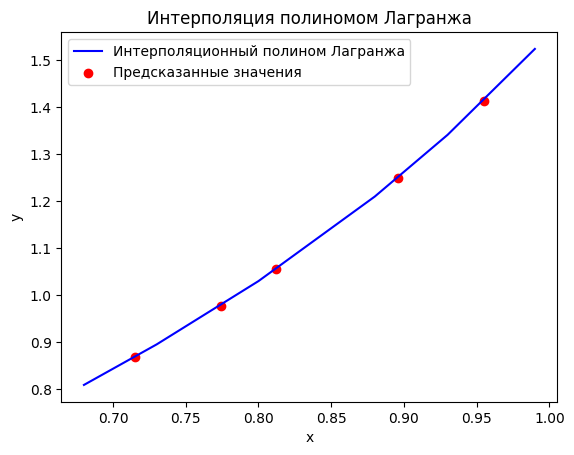

In [3]:
X=[0.68, 0.73, 0.80, 0.88, 0.93, 0.99]
Y = [0.80866, 0.89492, 1.02964, 1.20966, 1.34087, 1.52368]
X_ = [0.896, 0.812, 0.774, 0.955, 0.715]
Y_ = [l.subs(x, i).evalf() for i in X_]
plt.plot(X, Y, label='Интерполяционный полином Лагранжа', color='blue')
plt.scatter(X_, Y_, label='Предсказанные значения', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Интерполяция полиномом Лагранжа')


Используя таблицу значений функции a) рассчитать и
показать таблицу конечных разностей, b) по таблице конечных
разностей построить первую и вторую интерполяционные
формулы Ньютона, c) вычислить указанные значения функции при
данных значениях аргумента (помните, что пользоваться нужно
как первой, так и второй формулой, в зависимости от значения
аргумента)

Задание 2

In [6]:
X=[0.45,0.46,0.47,0.48,0.49,0.50]
Y=[20.1946,19.6133,18.9425,18.1746,17.3010,16.3123]
X_=[0.51,0.52,0.53,0.54,0.55,0.56]
Y_=[15.1984, 13.9484, 12.5508, 10.9937,9.2647,7.3510]

X_full = np.concatenate((X, X_))
Y_full = np.concatenate((Y, Y_))


def calculate_differences(y_vals):
    n = len(y_vals)
    fin_diffs = [[] for _ in range(n)]
    fin_diffs[0] = y_vals

    for i in range(1, n):
        for j in range(n - i):
            diff = fin_diffs[i - 1][j + 1] - fin_diffs[i - 1][j]
            fin_diffs[i].append(diff)
    return fin_diffs

fin_diffs_Y = calculate_differences(Y)

# Функция для вычисления коэффициентов интерполяционного полинома Ньютона
def newton_polynomial_coeffs(x_vals, fin_diffs):
    n = len(x_vals)
    h = x_vals[1] - x_vals[0]
    coeffs = [fin_diffs[0][0]]
    for i in range(1, n):
        coeffs.append(fin_diffs[i][0] / (np.math.factorial(i) * h**i))
    return coeffs
coeffs_Y = newton_polynomial_coeffs(X, fin_diffs_Y)

print(fin_diffs_Y,'\n', coeffs_Y)

[[20.1946, 19.6133, 18.9425, 18.1746, 17.301, 16.3123], [-0.5813000000000024, -0.6707999999999998, -0.7678999999999974, -0.8736000000000033, -0.9886999999999979], [-0.08949999999999747, -0.09709999999999752, -0.1057000000000059, -0.11509999999999465], [-0.007600000000000051, -0.008600000000008379, -0.00939999999998875], [-0.0010000000000083276, -0.000799999999980372], [0.0002000000000279556]] 
 [20.1946, -58.13000000000019, -447.4999999999865, -1266.6666666666717, -4166.666666701351, 16666.666668996226]


Для функции y=e
x
 составьте таблицу из 10 значений на
отрезке [2.5 ;2.7 ] . Постройте любой интерполяционный многочлен. Вычислите значение в произвольной точке и оцените погрешность вычисления.

In [9]:

def f(x):
    return np.exp(x)

x_values = np.linspace(2.5, 2.7, 10)
y_values = f(x_values)
def lagrange_polynomial(x, x_points, y_points):
    total = 0
    n = len(x_points)
    for i in range(n):
        xi, yi = x_points[i], y_points[i]
        def g(i, x):
            xi = x_points[i]
            product = 1
            for j in range(n):
                if i != j:
                    product *= (x - x_points[j]) / (xi - x_points[j])
            return product
        total += yi * g(i, x)
    return total

X = 2.55
estimated_value = lagrange_polynomial(X, x_values, y_values)


X_ = f(X)

# Оценка погрешности вычисления
delta = np.abs(estimated_value - X_)

estimated_value, X_, delta

(12.807103782663033, 12.80710378266303, 3.552713678800501e-15)